#머신러닝 분류모델 구현을 위한 전처리

##문제정의와 데이터준비

###문제정의

* 아이리스(붓꽃)의 데이터로 꽃의 종류를 3가지로 분류

###데이터 준비

In [ ]:
#파이썬에서 정형데이터(데이터표)를 다루는 판다스 라이브러리
import pandas as pd

In [ ]:
iris = pd.read_csv('iris_data.csv', engine='python')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'stem_length', 'longitude', 'latitude', 'leaves_count', 'label'],
      dtype='object')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,stem_length,longitude,latitude,leaves_count,label
0,5.1,3.5,1.4,0.2,58,82,13,6,setosa
1,4.9,3.0,1.4,0.2,56,9,5,6,setosa
2,4.7,3.2,1.3,0.2,60,27,35,6,setosa
3,4.6,3.1,1.5,0.2,59,8,41,4,setosa
4,5.0,3.6,1.4,0.2,59,13,30,6,setosa


##데이터 탐색

###데이터 기본 정보 살펴보기

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   stem_length   150 non-null    int64  
 5   longitude     150 non-null    int64  
 6   latitude      150 non-null    int64  
 7   leaves_count  150 non-null    int64  
 8   label         150 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 10.7+ KB


In [ ]:
iris.isnull().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
stem_length     150
longitude       150
latitude        150
leaves_count    150
label           150
dtype: int64

###데이터 속성 관계 살펴보기

In [ ]:
#통계 기법으로 데이터 속성들의 상관관계를 표현
#상관계수(독립변수들의 관련성을 수치로 표현)
irisf = iris.corr(method = 'pearson')
print(irisf)

              sepal_length  sepal_width  petal_length  petal_width  \
sepal_length      1.000000    -0.109369      0.871754     0.817954   
sepal_width      -0.109369     1.000000     -0.420516    -0.356544   
petal_length      0.871754    -0.420516      1.000000     0.962757   
petal_width       0.817954    -0.356544      0.962757     1.000000   
stem_length       0.103167    -0.036328      0.113745     0.122129   
longitude         0.002363    -0.010228      0.048858     0.043379   
latitude         -0.050195    -0.033566     -0.066886    -0.045803   
leaves_count      0.053148     0.072569      0.078974     0.064074   

              stem_length  longitude  latitude  leaves_count  
sepal_length     0.103167   0.002363 -0.050195      0.053148  
sepal_width     -0.036328  -0.010228 -0.033566      0.072569  
petal_length     0.113745   0.048858 -0.066886      0.078974  
petal_width      0.122129   0.043379 -0.045803      0.064074  
stem_length      1.000000  -0.055362  0.005246      0.

<ipython-input-17-601e2dd1b2ab>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  irisf = iris.corr(method = 'pearson')


###데이터 시각화

In [ ]:
#시각화를 위한 파이썬 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

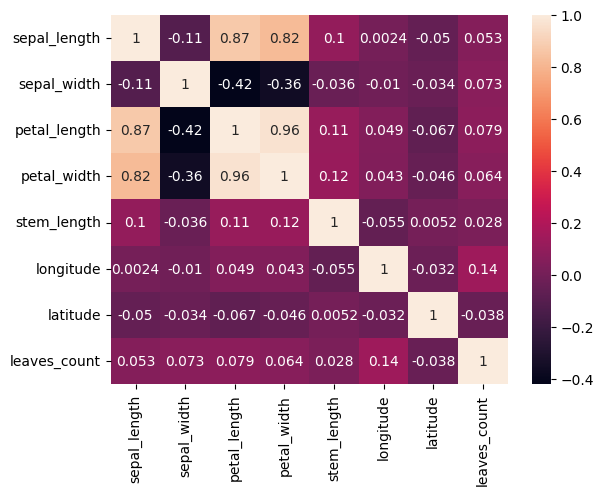

In [ ]:
sns.heatmap(data=irisf, annot=True)
plt.show()

##데이터 전처리

###상관계수가 낮은 데이터 속성(변수) 제거

In [ ]:
irisdata = iris.drop(['stem_length', 'longitude', 'latitude', 'leaves_count'], axis=1)
irisdata

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###정리된 데이터 속성(변수)로 레이블이 설명 가능한지 시각화

<Figure size 800x800 with 0 Axes>

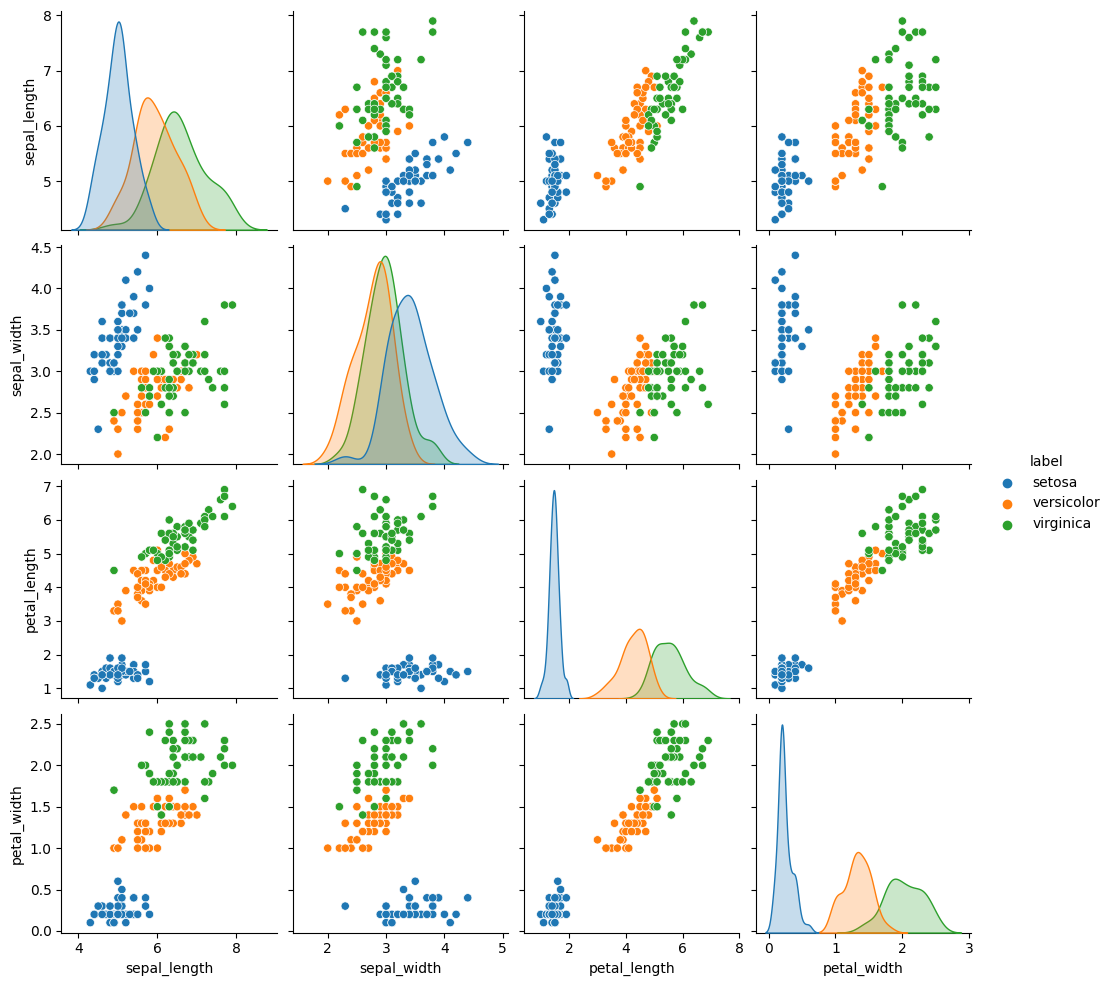

In [ ]:
sns.pairplot(data=irisdata, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue='label')
plt.show()

In [ ]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###머신러닝모델 알고리즘 연산을 위해 문자 데이터를 수치데이터로 변환

In [ ]:
irisdata = irisdata.replace('setosa', 0)
irisdata = irisdata.replace('versicolor', 1)
irisdata = irisdata.replace('virginica', 2)
irisdata

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##머신러닝 분류 모델을 위한 데이터

###데이터의 독립(설명)변수와 종속(결과)변수의 구분

In [ ]:
irisclass = irisdata['label']  #종속변수
irisfeature = irisdata[irisdata.columns.difference(['label'])] #독립변수
print(irisclass)
print(irisfeature)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64
     petal_length  petal_width  sepal_length  sepal_width
0             1.4          0.2           5.1          3.5
1             1.4          0.2           4.9          3.0
2             1.3          0.2           4.7          3.2
3             1.5          0.2           4.6          3.1
4             1.4          0.2           5.0          3.6
..            ...          ...           ...          ...
145           5.2          2.3           6.7          3.0
146           5.0          1.9           6.3          2.5
147           5.2          2.0           6.5          3.0
148           5.4          2.3           6.2          3.4
149           5.1          1.8           5.9          3.0

[150 rows x 4 columns]


###학습 데이터와 평가 데이터를 분리